In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

df.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [3]:
df.shape

(320772, 162)

In [4]:
duplicated_rows = df["code"].duplicated()
duplicated_rows.sum()

np.int64(22)

In [5]:
df = df.loc[duplicated_rows == False]
df.duplicated().sum()

np.int64(0)

In [6]:
missing_values = df.isnull().mean()

missing_values.loc[missing_values > 0.5].loc[missing_values < 0.8].sort_values()

additives_tags      0.517755
additives_fr        0.517755
cholesterol_100g    0.550772
trans-fat_100g      0.553241
calcium_100g        0.560249
vitamin-c_100g      0.560820
iron_100g           0.562083
vitamin-a_100g      0.571149
quantity            0.673266
pnns_groups_2       0.705406
pnns_groups_1       0.714691
categories          0.736898
categories_fr       0.736898
categories_tags     0.736901
main_category_fr    0.736973
main_category       0.736973
packaging_tags      0.753824
packaging           0.753827
image_url           0.763567
image_small_url     0.763567
dtype: float64

In [7]:
target = df["categories_fr"]

df = df.loc[:, missing_values < 0.5]

In [8]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [9]:
df = df[[
    "brands",
    "ingredients_text",
    "nutrition_grade_fr",
    "energy_100g",
    "fat_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "nutrition-score-fr_100g"
]]

In [13]:
nutritive_values = ["energy_100g", "fat_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g"]

fig = px.bar(data_frame=df, x="energy_100g")
fig.show()

In [11]:
df = df.loc[df["energy_100g"] < 3700].loc[df["energy_100g"] >= 0]
df = df.loc[df["fat_100g"] < 100].loc[df["fat_100g"] >= 0]
df = df.loc[df["sugars_100g"] < 100].loc[df["sugars_100g"] >= 0]
df = df.loc[df["fiber_100g"] < 100].loc[df["fiber_100g"] >= 0]
df = df.loc[df["proteins_100g"] < 100].loc[df["proteins_100g"] >= 0]
df = df.loc[df["salt_100g"] < 100].loc[df["salt_100g"] >= 0]

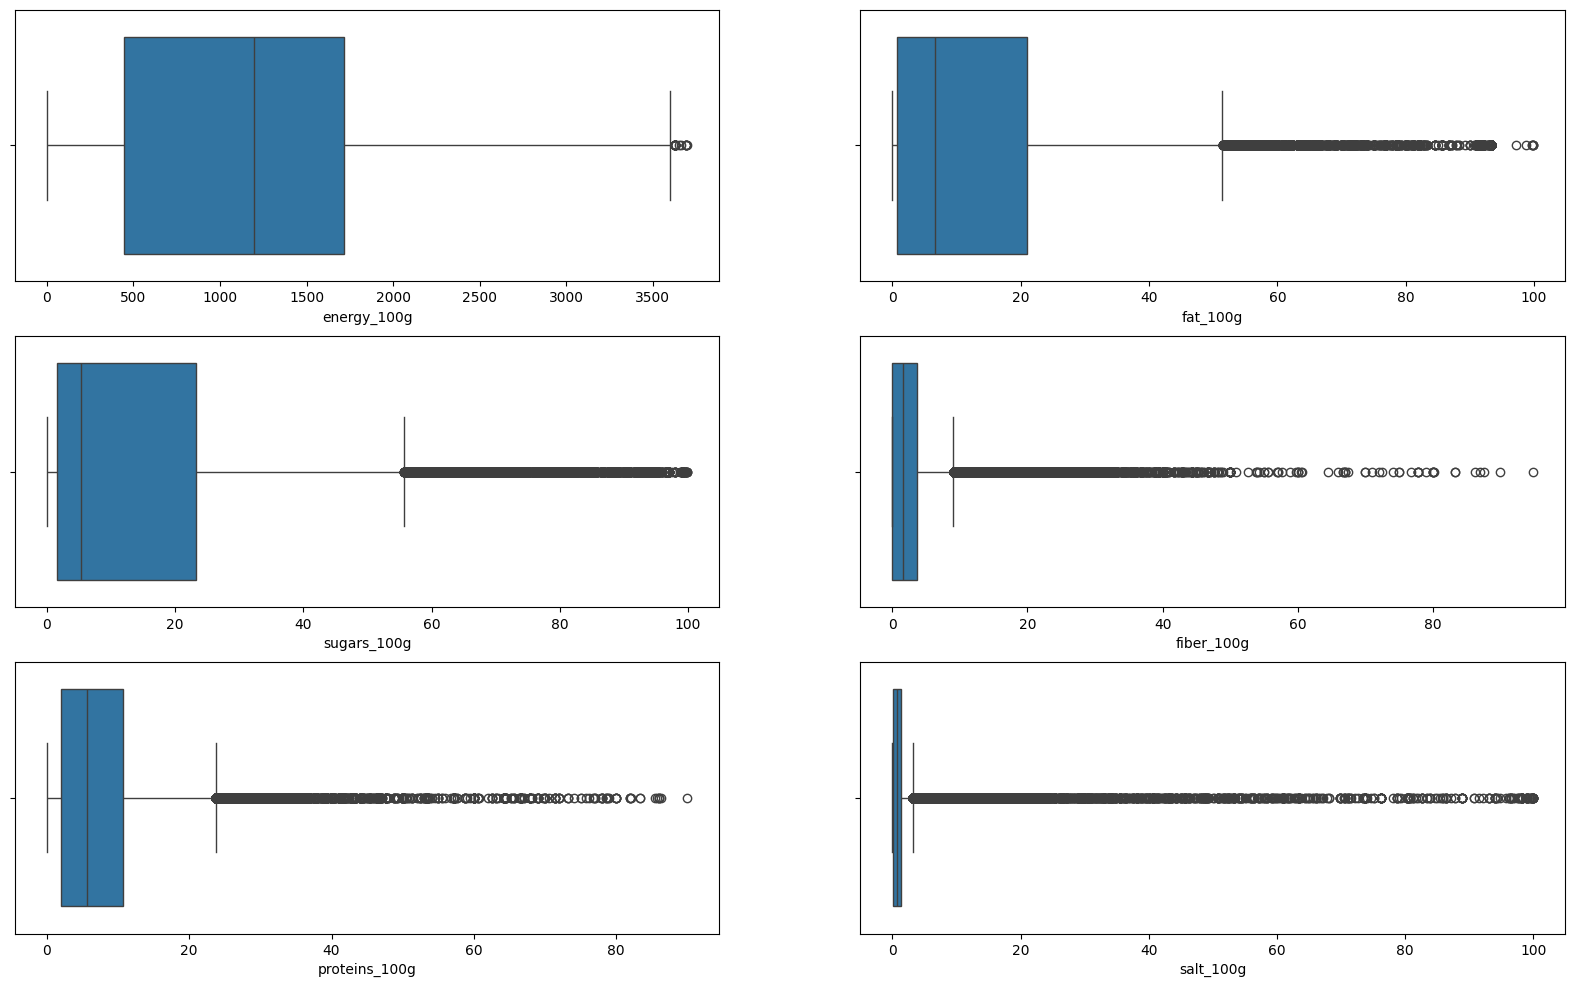

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(20,12))

ax = ax.flatten()

for i, value in enumerate(nutritive_values[0:6]):
    sns.boxplot(data=df, x=value, ax=ax[i])